## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_regression

from LocalizedRegression import LocalizedRegression

## Input with one dimension

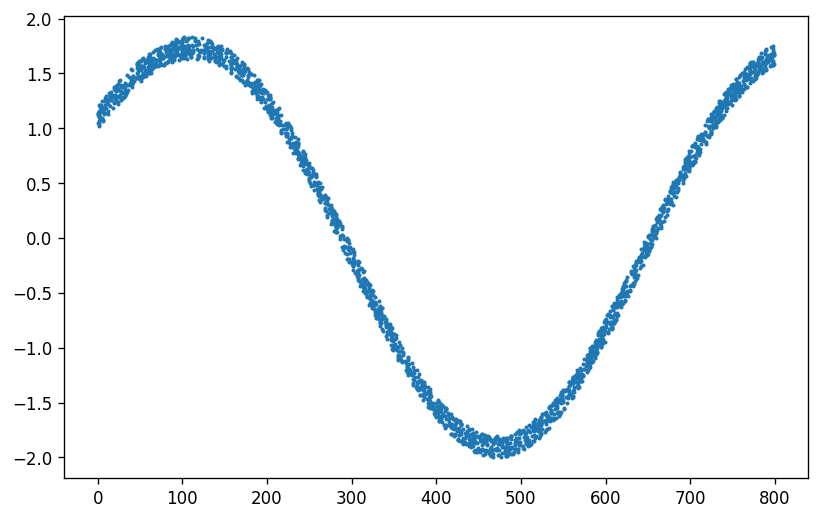

In [2]:
x = np.random.randint(800, size = 2500)
y = np.sin(x / 100) + np.cos(x / 150) + (np.random.random(size = len(x)) * 0.2)

plt.figure(figsize = (8, 5), dpi = 120)
plt.scatter(x, y, s = 2)
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2000, 1), (500, 1), (2000,), (500,))

In [4]:
lr: LocalizedRegression = LocalizedRegression(None, n_neighbors = 5, n_estimators = 3, fit_ratio = 15 / len(X_train))
print(lr.fit_ratio)
lr.fit(X_train, y_train)

0.0075


LocalizedRegression(estimator=Ridge(), fit_ratio=0.0075, n_estimators=3,
                    n_neighbors=5)

Train R2: 0.89
Test R2: 0.88


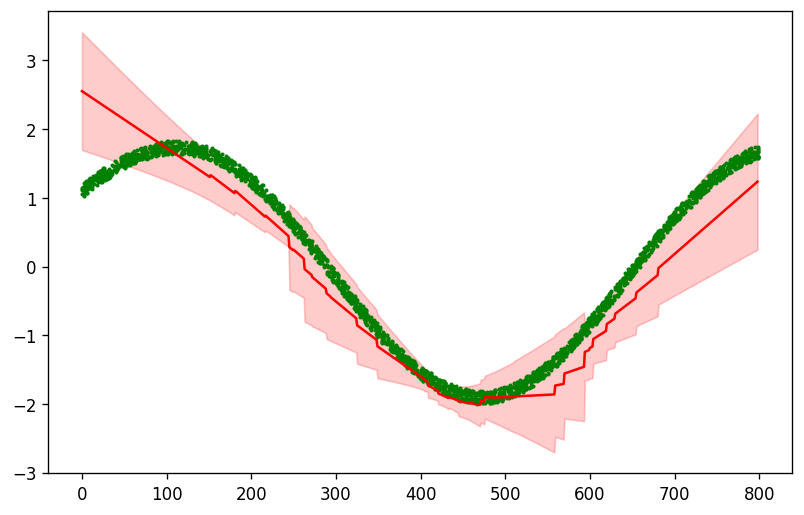

In [5]:
pred_x = np.arange(x.min(), x.max())
pred_y = lr.predict(pred_x.reshape(-1, 1), reduction = None)
pred_y_mean = pred_y.mean(axis = (1, 2))
pred_y_std = pred_y.std(axis = (1, 2))
print(f"Train R2: {lr.score(X_train, y_train):.2f}")
print(f"Test R2: {lr.score(X_test, y_test):.2f}")

plt.figure(figsize = (8, 5), dpi = 120)
plt.fill_between(
    pred_x,
    pred_y_mean + pred_y_std,
    pred_y_mean - pred_y_std,
    color = "#ff000033"
)
plt.scatter(x, y, s = 2, color = "green")
plt.plot(pred_x, pred_y_mean, color = "red")
plt.show()

## Input with multiple dimensions

In [6]:
X, y = make_regression(n_samples = 10_000, n_features = 5, noise = 1, random_state = 7)
X.shape, y.shape

((10000, 5), (10000,))

In [7]:
lr: LocalizedRegression = LocalizedRegression(None, n_neighbors = 5, n_estimators = 3, fit_ratio = 0.005)
cv_scores = cross_val_score(lr, X, y)
cv_scores.mean().round(2), cv_scores.round(2)

(0.81, array([0.84, 0.8 , 0.81, 0.83, 0.76]))